## Data Collection
fdsfdsfs

In [5]:
import os
from pathlib import Path
import numpy as np
from PIL import Image
from IPython.display import clear_output

# Create a list in a range of 8863 - 9037 (inclusive) to get total of 10000 images 
# 5000 for cancerous and 5000 for non-cancerous
start=8863
end=9037
index = [*range(start, end+1, 1)]
branch=[0,1] 

X=np.array([])
y=np.array([])

limit = 10000
class_size = limit/2 

row=0 
desired_image_size=50 
flag_0=0 
flag_1=0 
check_flag=0 


for i in range(len(index)): 
    for j in range(len(branch)): 
        if(check_flag==0): 
            path_data_dir = './'+str(index[i])+'./'+str(branch[j])
            path_filenames = list(Path(path_data_dir).resolve().glob("*.png")) 
        
            for path_file in path_filenames:
                    filename=str(path_file) 
                    label=np.array([int(filename[-5])]).reshape(1,1) 
            
                    # Load image and resize image to 50*50 pixels
                    image = Image.open(path_file).resize((desired_image_size,desired_image_size)) 

            
                    # Convert image to array
                    image_arr = (np.array(image)).reshape(1,-1) 
           
                    if(row==0):
                        X=image_arr 
                        y=label  
                
                    else:
                        print("Number of Non-Cancerous Cells:",len(y)-np.count_nonzero(y == 1)) 
                        print("Number of Cancerous Cells:",np.count_nonzero(y == 1)) 
                        if(((len(y)-np.count_nonzero(y == 1))<class_size and label==0) or (np.count_nonzero(y == 1)<class_size and label==1)):
                            X=np.append(X,image_arr,axis=0) 
                            y=np.append(y,label,axis=0)  
                            #print(y.shape)
                    
                    clear_output(True) 
                    print("Path file:",str(path_file),"\n") 
                    print("Check Flag:",check_flag,"\n") 
                    row+=1 
                
    #If zero is enough
    if(len(y)-np.count_nonzero(y == 1)==class_size): 
        branch=[1] 
        flag_0=1 
                    
    #If one is enough
    if(np.count_nonzero(y == 1)==class_size):
        branch=[0] 
        flag_1=1                    
                
    #If both enough
    if(flag_0==1 and flag_1==1):
        check_flag=1
                

Path file: C:\Users\HP\OneDrive - Monash University\ECE4179\Final Project\From Kaggle\archive\IDC_regular_ps50_idx5\8916\1\8916_idx5_x951_y251_class1.png 

Check Flag: 0 



In [34]:
print(X.shape)

(10000, 7500)


In [35]:
from numpy import savetxt
# save to csv file
savetxt('data.csv', X, delimiter=',')
savetxt('label.csv',y,delimiter=',')


In [8]:
import os
from pathlib import Path
import numpy as np
from PIL import Image
from IPython.display import clear_output

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data.dataloader as dataloader

In [14]:
# load numpy array from csv file
from numpy import loadtxt
# load array
data = loadtxt('data.csv', delimiter=',')
# print the array
print(data[0:10])

[[162. 110. 158. ... 156.  84. 138.]
 [129.  70. 120. ... 101.  52. 108.]
 [216. 148. 179. ... 117.  82. 134.]
 ...
 [204. 113. 150. ... 168.  67. 112.]
 [203. 163. 188. ... 135.  73. 122.]
 [204. 116. 158. ... 147.  93. 143.]]


In [5]:
from pathlib import Path

path_data_dir = './'+'8863'+'./'+'0'
path_filenames = list(Path(path_data_dir).resolve().glob("*.png"))
first=0

# Load image and resize image to 50*50 pixels
for path_file in path_filenames:
    if(first==0):
        image = Image.open(path_file).resize((50,50))
        # Convert image to array
        image_arr = (np.array(image))
        print(image_arr.shape)
        first=1

(50, 50, 3)


[[[162 110 158]
  [151 117 160]
  [179  99 137]
  ...
  [182  86 127]
  [166  81 125]
  [190  99 138]]

 [[148 100 148]
  [160  98 136]
  [179 113 159]
  ...
  [133  60 108]
  [186  94 134]
  [162  82 127]]

 [[162 100 145]
  [185  98 138]
  [160  95 138]
  ...
  [127  65 115]
  [181 102 141]
  [145  69 117]]

 ...

 [[135  80 122]
  [119  75 120]
  [128  77 129]
  ...
  [124  72 125]
  [141  78 129]
  [157  94 144]]

 [[176  99 147]
  [146  73 114]
  [142  67 116]
  ...
  [128  78 129]
  [167 139 180]
  [155 108 156]]

 [[143  87 135]
  [145  79 126]
  [137  90 139]
  ...
  [140  87 139]
  [148  87 139]
  [156  84 138]]]
uint8
(50, 50, 3)


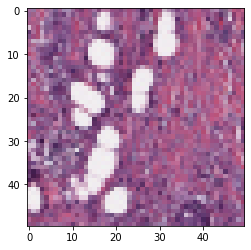

In [21]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

# Convert array to image
img_array=np.array(data[0])
#print(img_array.shape)
y = np.expand_dims(img_array, axis=1)
#print(y.shape)
z = np.expand_dims(y, axis=1)
#print(z.shape)
img_array=z.reshape(50,50,3)
img_array = img_array.astype(np.uint8)
print(img_array)
print(img_array.dtype)
print(img_array.shape)


#Display image
plt.imshow(img_array)
plt.show()

In [44]:
print(data.shape)
print(type(data))

(10000, 7500)
<class 'numpy.ndarray'>


In [19]:
a = torch.randn(5, 4)
print(a)
torch.mean(a, 0)

tensor([[-0.8343, -0.6490,  0.6787,  1.0324],
        [-1.4814,  0.8577,  0.8660,  0.4556],
        [-1.6675, -1.7260, -0.9698,  0.3485],
        [ 0.2852,  0.7744, -0.4732,  0.1731],
        [ 0.2923, -2.1122,  0.3301, -0.8347]])


tensor([-0.6811, -0.5710,  0.0864,  0.2350])

In [45]:
#Prepare a composition of transforms
#transforms.Compose will perform the transforms in order
#NOTE: some transform only take in a PIL image, others only a Tensor
#EG Resize and ToTensor take in a PIL Image, Normalize takes in a Tensor
#Refer to documentation
tensor_transform = transforms.Compose([
            transforms.ToTensor()])

#Note: ToTensor() will scale unit8 and similar type data to a float and re-scale to 0-1
#Note: We are normalizing with the dataset mean and std 

In [50]:
data_tensor = transform(data.astype(np.uint8))
print(demo_data)

tensor([[[0.6353, 0.4314, 0.6196,  ..., 0.6118, 0.3294, 0.5412],
         [0.5059, 0.2745, 0.4706,  ..., 0.3961, 0.2039, 0.4235],
         [0.8471, 0.5804, 0.7020,  ..., 0.4588, 0.3216, 0.5255],
         ...,
         [0.5843, 0.4745, 0.6039,  ..., 0.7373, 0.4902, 0.6157],
         [0.7686, 0.6157, 0.7373,  ..., 0.7373, 0.5686, 0.7098],
         [0.6196, 0.4275, 0.6078,  ..., 0.5686, 0.3922, 0.5765]]])


In [51]:
data_mean = torch.mean(data_tensor)
data_std = torch.std(data_tensor)
print("Mean:",data_mean, "Standard deviation:",data_std)

Mean: tensor(0.6826) Standard deviation: tensor(0.1951)


In [52]:
#Prepare a composition of transforms
#transforms.Compose will perform the transforms in order
#NOTE: some transform only take in a PIL image, others only a Tensor
#EG Resize and ToTensor take in a PIL Image, Normalize takes in a Tensor
#Refer to documentation
normalize = transforms.Compose([
            transforms.Normalize([data_mean], [data_std])])

#Note: ToTensor() will scale unit8 and similar type data to a float and re-scale to 0-1
#Note: We are normalizing with the dataset mean and std 

In [55]:
train_data = normalize(data_tensor)
print(train_data)

tensor([[[-0.2423, -1.2874, -0.3227,  ..., -0.3629, -1.8100, -0.7247],
         [-0.9056, -2.0914, -1.0865,  ..., -1.4683, -2.4532, -1.3276],
         [ 0.8431, -0.5237,  0.0994,  ..., -1.1468, -1.8502, -0.8051],
         ...,
         [-0.5036, -1.0664, -0.4031,  ...,  0.2803, -0.9860, -0.3428],
         [ 0.4411, -0.3428,  0.2803,  ...,  0.2803, -0.5840,  0.1396],
         [-0.3227, -1.3075, -0.3830,  ..., -0.5840, -1.4884, -0.5438]]])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


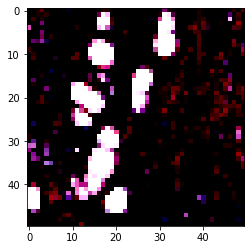

In [57]:
plt.imshow(train_data[0][0].reshape(50,50,3))
plt.show()